## Disadvantages of using ANN for image classification
#### Too much Computation
#### Treats local pixels same as pixels far apart
#### Sensitive to location of an object in an image

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets,layers,models

In [2]:
tf.compat.v1.losses.sparse_softmax_cross_entropy


<function tensorflow.python.ops.losses.losses_impl.sparse_softmax_cross_entropy(labels, logits, weights=1.0, scope=None, loss_collection='losses', reduction='weighted_sum_by_nonzero_weights')>

In [3]:
(x_train,y_train),(x_test,y_test)=datasets.cifar10.load_data()
x_train.shape

(50000, 32, 32, 3)

In [4]:
x_test.shape

(10000, 32, 32, 3)

In [5]:
y_train.shape

(50000, 1)

In [6]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [7]:
y_train=y_train.reshape(-1,)

In [8]:
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [9]:
classes="airplane automobile bird cat deer dog frog horse ship truck".split()


In [10]:
def imshow(x,y,index):
    plt.figure(figsize=(15,3))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])
    

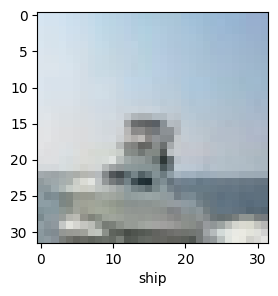

In [11]:
imshow(x_train,y_train,100)

In [12]:
x_train=x_train/255
x_test=x_test/255

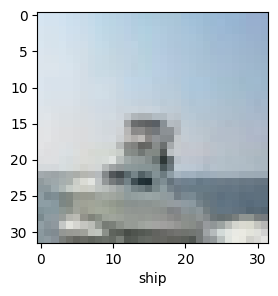

In [13]:
imshow(x_train,y_train,100)

## Model building and training 

In [21]:
model=models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(2000,activation="relu"),
    layers.Dense(1000,activation="relu"),
    layers.Dense(10,activation="softmax"),
])

model.compile(optimizer="SGD",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

model.fit(x_train,y_train,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 36s 23ms/step - loss: 1.8179 - accuracy: 0.3544
Epoch 2/5
1563/1563 [==============================] - 36s 23ms/step - loss: 1.6317 - accuracy: 0.4232
Epoch 3/5
1563/1563 [==============================] - 36s 23ms/step - loss: 1.5479 - accuracy: 0.4531
Epoch 4/5
1563/1563 [==============================] - 36s 23ms/step - loss: 1.4893 - accuracy: 0.4749
Epoch 5/5
1563/1563 [==============================] - 36s 23ms/step - loss: 1.4387 - accuracy: 0.4947


In [22]:
from sklearn.metrics import confusion_matrix
y_preds=model.predict(x_test)
y_preds_final=[np.argmax(i) for i in y_preds]
print(model.evaluate(x_test,y_test))
print(confusion_matrix(y_test,y_preds_final))

313/313 [==============================] - 1s 4ms/step - loss: 1.4450 - accuracy: 0.4875
[1.4449795484542847, 0.48750001192092896]
[[488  35  56   9  55   0  40  27 246  44]
 [ 22 638  15  17  13   3  25  22 110 135]
 [ 76  31 318  84 156  24 191  52  55  13]
 [ 29  34  99 328  86  57 206  44  56  61]
 [ 47  19 110  44 437  10 199  72  47  15]
 [ 16  26 107 229 103 193 163  75  57  31]
 [  7  28  46  42 103   7 700  18  25  24]
 [ 27  34  72  53 113  27  63 501  45  65]
 [ 65  63  15  23  22   3  18  14 734  43]
 [ 20 184  12  26  15   5  36  34 130 538]]


In [23]:
cnn=models.Sequential([
    #cnn
    layers.Conv2D(filters=32,kernel_size=(3,3),activation="relu",input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=64,kernel_size=(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),
    #dense
    layers.Flatten(),
    layers.Dense(64,activation="relu"),
    layers.Dense(10,activation="softmax"),
])

cnn.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

cnn.fit(x_train,y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 12s 7ms/step - loss: 1.5088 - accuracy: 0.4514
Epoch 2/10
1563/1563 [==============================] - 11s 7ms/step - loss: 1.1531 - accuracy: 0.5955
Epoch 3/10
1563/1563 [==============================] - 11s 7ms/step - loss: 1.0187 - accuracy: 0.6462
Epoch 4/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.9344 - accuracy: 0.6720
Epoch 5/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.8718 - accuracy: 0.6979
Epoch 6/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.8197 - accuracy: 0.7171
Epoch 7/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.7732 - accuracy: 0.7316
Epoch 8/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.7321 - accuracy: 0.7451
Epoch 9/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.7013 - accuracy: 0.7549
Epoch 10/10
1563/1563 [==============================] - 11s 7ms/step - l

In [24]:
cnn.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.9060 - accuracy: 0.6965


[0.9059609174728394, 0.6965000033378601]

In [20]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [26]:
y_test=y_test.reshape(-1,)

In [27]:
y_test

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

In [25]:
y_preds_cnn=cnn.predict(x_test)

313/313 [==============================] - 1s 3ms/step


In [29]:
y_preds_cnn_final=[np.argmax(i) for i in y_preds_cnn]

In [30]:
y_preds_cnn_final[:5]

[3, 8, 8, 0, 6]

In [31]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

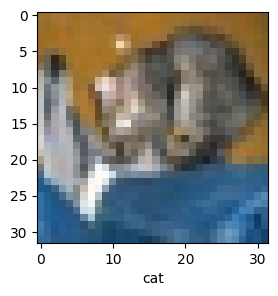

In [32]:
imshow(x_test,y_test,0)

In [33]:
classes[y_preds_cnn_final[0]]

'cat'